#### Course Recommendation System using Udemy Dataset

#### Algo
+ Cosine Similarity
+ Linear Similarity


#### Workflow
+ Dataset
+ Vectorized our dataset
+ Cosine Similarity Matrix
+ ID,Score
+ Recommend


In [2]:
pip install neattext --user

     ---------------------------------------- 0.0/114.7 kB ? eta -:--:--
     -------------------------------------- 114.7/114.7 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load EDA Pkgs
import pandas as pd
import neattext.functions as nfx

In [4]:
# Load ML/Rc Pkgs
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [5]:
# Load our dataset
df = pd.read_csv("data/udemy_courses.csv")

In [6]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [7]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3678    Learn jQuery from Scratch - Master of JavaScri...
3679    How To Design A WordPress Website With No Codi...
3680                        Learn and Build using Polymer
3681    CSS Animations: Create Amazing Effects on Your...
3682    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3683, dtype: object

In [8]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [10]:
# Clean Text:stopwords,special charac
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [11]:
df[['course_title','clean_course_title']]

,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Practice
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultants
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017
4,How To Maximize Your Profits Trading Options,Maximize Profits Trading Options
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3679,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3680,Learn and Build using Polymer,Learn Build Polymer
3681,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


In [12]:
# Vectorize our Text
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(df['clean_course_title'])

In [13]:
# Sparse
cv_mat

<3683x3564 sparse matrix of type '<class 'numpy.int64'>'
	with 18364 stored elements in Compressed Sparse Row format>

In [16]:
# Dense
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
#df_cv_words = pd.DataFrame(cv_mat.todense(),columns=count_vect.get_feature_names())

df_cv_words = pd.DataFrame(cv_mat.todense(), columns=count_vect.get_feature_names_out())


In [18]:
df_cv_words.head()

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(cv_mat)

In [20]:
cosine_sim_mat

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

<Axes: >

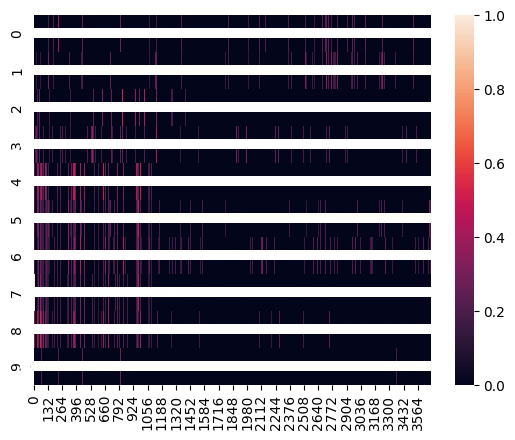

In [21]:
import seaborn as sns
sns.heatmap(cosine_sim_mat[0:10],annot=True)

In [22]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Practice
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling Business Analysts Consultants
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner Pro Financial Analysis Excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,Maximize Profits Trading Options


In [23]:
# Get Course ID/Index
course_indices = pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [24]:
course_indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64

In [25]:
course_indices['How To Maximize Your Profits Trading Options']

4

In [26]:
idx = course_indices['How To Maximize Your Profits Trading Options']

In [27]:
idx

4

In [28]:
scores = list(enumerate(cosine_sim_mat[idx]))

In [29]:
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.20412414523193154),
 (6, 0.20412414523193154),
 (7, 0.1889822365046136),
 (8, 0.3779644730092272),
 (9, 0.0),
 (10, 0.20412414523193154),
 (11, 0.5),
 (12, 0.0),
 (13, 0.17677669529663687),
 (14, 0.35355339059327373),
 (15, 0.0),
 (16, 0.0),
 (17, 0.1889822365046136),
 (18, 0.22360679774997896),
 (19, 0.0),
 (20, 0.30151134457776363),
 (21, 0.20412414523193154),
 (22, 0.1889822365046136),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.1889822365046136),
 (30, 0.35355339059327373),
 (31, 0.0),
 (32, 0.0),
 (33, 0.3779644730092272),
 (34, 0.0),
 (35, 0.3779644730092272),
 (36, 0.30151134457776363),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.5669467095138407),
 (44, 0.35355339059327373),
 (45, 0.0),
 (46, 0.35355339059327373),
 (47, 0.0),
 (48, 0.35355339059327373),
 (49, 0.4082482904638631),
 (50, 0.22360679774997896),
 (51, 0.0),
 (52, 0.1889822365046136),


In [30]:
# Sort our scores per cosine score
sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)

In [31]:
# Omit the First Value/itself
sorted_scores[1:]

[(410, 0.5773502691896258),
 (43, 0.5669467095138407),
 (96, 0.5303300858899106),
 (138, 0.5303300858899106),
 (195, 0.5303300858899106),
 (444, 0.5303300858899106),
 (803, 0.5303300858899106),
 (11, 0.5),
 (59, 0.5),
 (68, 0.5),
 (71, 0.5),
 (97, 0.5),
 (330, 0.5),
 (378, 0.5),
 (514, 0.5),
 (647, 0.5),
 (738, 0.5),
 (947, 0.5),
 (991, 0.5),
 (811, 0.45226701686664544),
 (66, 0.4472135954999579),
 (222, 0.4472135954999579),
 (234, 0.4472135954999579),
 (369, 0.4472135954999579),
 (439, 0.4472135954999579),
 (463, 0.4472135954999579),
 (766, 0.4472135954999579),
 (829, 0.4472135954999579),
 (399, 0.4330127018922194),
 (49, 0.4082482904638631),
 (54, 0.4082482904638631),
 (72, 0.4082482904638631),
 (85, 0.4082482904638631),
 (107, 0.4082482904638631),
 (160, 0.4082482904638631),
 (167, 0.4082482904638631),
 (205, 0.4082482904638631),
 (295, 0.4082482904638631),
 (353, 0.4082482904638631),
 (402, 0.4082482904638631),
 (411, 0.4082482904638631),
 (802, 0.4082482904638631),
 (953, 0.408248

In [32]:
# Selected Courses Indices
selected_course_indices = [i[0] for i in sorted_scores[1:]]

In [33]:
selected_course_indices

[410,
 43,
 96,
 138,
 195,
 444,
 803,
 11,
 59,
 68,
 71,
 97,
 330,
 378,
 514,
 647,
 738,
 947,
 991,
 811,
 66,
 222,
 234,
 369,
 439,
 463,
 766,
 829,
 399,
 49,
 54,
 72,
 85,
 107,
 160,
 167,
 205,
 295,
 353,
 402,
 411,
 802,
 953,
 956,
 1002,
 8,
 33,
 35,
 102,
 109,
 113,
 157,
 186,
 363,
 434,
 510,
 650,
 798,
 900,
 14,
 30,
 44,
 46,
 48,
 75,
 89,
 149,
 153,
 200,
 346,
 361,
 366,
 377,
 416,
 451,
 471,
 566,
 628,
 708,
 794,
 864,
 909,
 954,
 963,
 1023,
 1112,
 1115,
 1134,
 1136,
 1141,
 1151,
 62,
 315,
 618,
 683,
 20,
 36,
 201,
 398,
 709,
 99,
 108,
 118,
 302,
 387,
 403,
 468,
 477,
 479,
 538,
 583,
 648,
 652,
 745,
 777,
 823,
 833,
 844,
 863,
 883,
 948,
 962,
 1005,
 1089,
 1171,
 256,
 67,
 77,
 78,
 84,
 88,
 135,
 144,
 164,
 208,
 284,
 299,
 320,
 350,
 356,
 394,
 408,
 429,
 448,
 493,
 500,
 533,
 559,
 570,
 598,
 694,
 696,
 764,
 769,
 815,
 921,
 1012,
 1021,
 1135,
 18,
 50,
 79,
 90,
 141,
 187,
 188,
 196,
 221,
 233,
 248,
 2

In [34]:
# Selected Courses Scores
selected_course_scores = [i[1] for i in sorted_scores[1:]]

In [35]:
recommended_result = df['course_title'].iloc[selected_course_indices]

In [36]:
rec_df = pd.DataFrame(recommended_result)

In [37]:
rec_df.head()

,course_title
410,Trading Options Basics
43,Options Trading - How to Win with Weekly Options
96,Intermediate Options trading concepts for Stoc...
138,Forex Trading with Fixed 'Risk through Options...
195,Trading Options For Consistent Returns: Option...


In [38]:
rec_df['similarity_scores'] = selected_course_scores

In [39]:
rec_df

,course_title,similarity_scores
410,Trading Options Basics,0.577350
43,Options Trading - How to Win with Weekly Options,0.566947
96,Intermediate Options trading concepts for Stoc...,0.530330
138,Forex Trading with Fixed 'Risk through Options...,0.530330
195,Trading Options For Consistent Returns: Option...,0.530330
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,0.000000
3679,How To Design A WordPress Website With No Codi...,0.000000
3680,Learn and Build using Polymer,0.000000
3681,CSS Animations: Create Amazing Effects on Your...,0.000000


In [41]:
def recommend_course(title, num_of_rec=10):
    # Assuming 'course_indices' is defined and maps course titles to indices
    idx = course_indices[title]
    
    # Assuming 'cosine_sim_mat' is defined and contains cosine similarity scores
    scores = list(enumerate(cosine_sim_mat[idx]))
    
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    
    # Assuming 'df' is defined and contains information about courses, including titles
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    
    return rec_df.head(num_of_rec)

# Assuming you have defined other necessary data structures and variables


In [42]:
'''
def recommend_course(title,num_of_rec=10):
    # ID for title
    idx = course_indices[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recomm
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)Coe Pkgs 
'''    

"\ndef recommend_course(title,num_of_rec=10):\n    # ID for title\n    idx = course_indices[title]\n    # Course Indice\n    # Search inside cosine_sim_mat\n    scores = list(enumerate(cosine_sim_mat[idx]))\n    # Scores\n    # Sort Scores\n    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)\n    # Recomm\n    selected_course_indices = [i[0] for i in sorted_scores[1:]]\n    selected_course_scores = [i[1] for i in sorted_scores[1:]]\n    result = df['course_title'].iloc[selected_course_indices]\n    rec_df = pd.DataFrame(result)\n    rec_df['similarity_scores'] = selected_course_scores\n    return rec_df.head(num_of_rec)Coe Pkgs \n"

In [43]:
recommend_course('Trading Options Basics',20)

,course_title,similarity_scores
97,Options Trading 101: The Basics,0.866025
195,Trading Options For Consistent Returns: Option...,0.816497
864,Basics of Trading,0.816497
66,Options Trading Basics (3-Course Bundle),0.774597
802,Trading: Basics of Trading for Beginners,0.707107
956,Options Basics & Trading With Small Capital! -...,0.707107
43,Options Trading - How to Win with Weekly Options,0.654654
96,Intermediate Options trading concepts for Stoc...,0.612372
138,Forex Trading with Fixed 'Risk through Options...,0.612372
444,The Advantages of ETF Options and Index Option...,0.612372


In [44]:
df.to_csv("data/udemy_courses_clean.csv")